In [1]:
file_names=['train.csv','test.csv','sample_submission.csv']

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_df1= pd.read_csv('train.csv')

In [5]:
feature_object_dtype_list=[col for col in train_df1.columns if train_df1[col].dtype == np.object]

In [6]:
print((feature_object_dtype_list))

['T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V11', 'T1_V12', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V3', 'T2_V5', 'T2_V11', 'T2_V12', 'T2_V13']


In [7]:
feature_int_dtype_list=[col for col in train_df1.columns if train_df1[col].dtype==np.int64 and (not(col == 'Id' or col == 'Hazard'))]

In [8]:
print(feature_int_dtype_list)

['T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14', 'T2_V1', 'T2_V2', 'T2_V4', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10', 'T2_V14', 'T2_V15']


In [9]:
T1_Num_attr_list=[col for col in feature_int_dtype_list if col.startswith('T1_')==True]

In [10]:
print(T1_Num_attr_list)

['T1_V1', 'T1_V2', 'T1_V3', 'T1_V10', 'T1_V13', 'T1_V14']


In [11]:
melt_Hazard_with_T1attr=pd.melt(train_df1,id_vars='Hazard',value_vars=T1_Num_attr_list)

In [12]:
melt_Hazard_with_T1attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305994 entries, 0 to 305993
Data columns (total 3 columns):
Hazard      305994 non-null int64
variable    305994 non-null object
value       305994 non-null int64
dtypes: int64(2), object(1)
memory usage: 7.0+ MB


In [13]:
melt_Hazard_with_T1attr['variable'].astype('category')

0          T1_V1
1          T1_V1
2          T1_V1
3          T1_V1
4          T1_V1
5          T1_V1
6          T1_V1
7          T1_V1
8          T1_V1
9          T1_V1
10         T1_V1
11         T1_V1
12         T1_V1
13         T1_V1
14         T1_V1
15         T1_V1
16         T1_V1
17         T1_V1
18         T1_V1
19         T1_V1
20         T1_V1
21         T1_V1
22         T1_V1
23         T1_V1
24         T1_V1
25         T1_V1
26         T1_V1
27         T1_V1
28         T1_V1
29         T1_V1
           ...  
305964    T1_V14
305965    T1_V14
305966    T1_V14
305967    T1_V14
305968    T1_V14
305969    T1_V14
305970    T1_V14
305971    T1_V14
305972    T1_V14
305973    T1_V14
305974    T1_V14
305975    T1_V14
305976    T1_V14
305977    T1_V14
305978    T1_V14
305979    T1_V14
305980    T1_V14
305981    T1_V14
305982    T1_V14
305983    T1_V14
305984    T1_V14
305985    T1_V14
305986    T1_V14
305987    T1_V14
305988    T1_V14
305989    T1_V14
305990    T1_V14
305991    T1_V

In [14]:
_=melt_Hazard_with_T1attr.boxplot(column='value',by='variable')

In [15]:
_=plt.xlabel('value')

In [16]:
_=plt.ylabel('count')

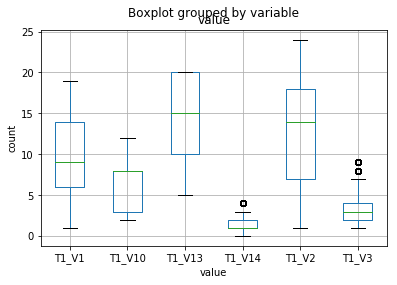

In [17]:
plt.show()

In [18]:
_=train_df1.plot(kind='scatter',y='Hazard',x='T1_V1',color='red')

In [19]:
_=train_df1.plot(kind='scatter',y='Hazard',x='T1_V3')

In [20]:
_=train_df1.plot(kind='scatter',y='T1_V1',x='T1_V2')

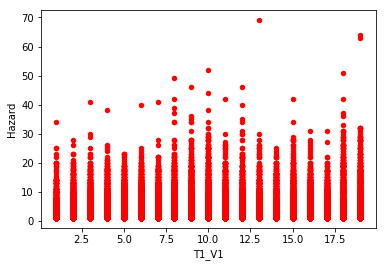

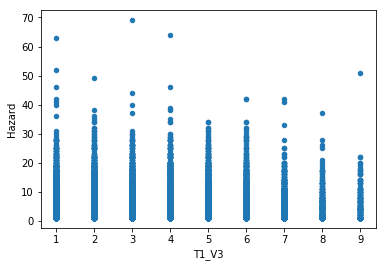

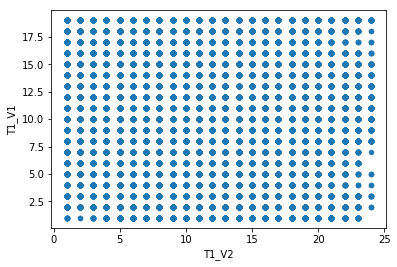

In [21]:
plt.show()

In [22]:
_=train_df1['T1_V1'].plot(kind='hist')

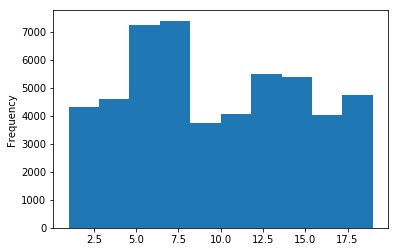

In [23]:
plt.show()

In [24]:
hazard=train_df1['Hazard']

In [25]:
_=hazard.plot(kind='hist',bins=200)

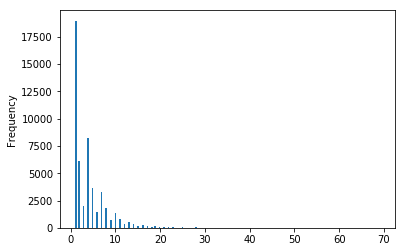

In [26]:
plt.show()

In [27]:
num_sum = train_df1[feature_int_dtype_list].sum(axis=1,numeric_only=True)

In [28]:
num_sum.shape

(50999,)

In [29]:
num_sum.head()

0    161
1    216
2    230
3    202
4    186
dtype: int64

In [30]:
train_df1[feature_int_dtype_list].head(1)

,T1_V1,T1_V2,T1_V3,T1_V10,T1_V13,T1_V14,T2_V1,T2_V2,T2_V4,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V14,T2_V15
0,15,3,2,7,15,1,36,11,10,2,37,1,11,6,2,2


In [31]:
num_sum_mean=(num_sum)/16

In [32]:
num_sum_mean

0        10.0625
1        13.5000
2        14.3750
3        12.6250
4        11.6250
5        12.8750
6        15.5625
7        14.4375
8         7.4375
9        13.1875
10       12.9375
11        8.5625
12       10.1250
13       15.5625
14       12.0000
15        8.9375
16       11.3125
17       11.5625
18       12.1875
19       12.0000
20       13.7500
21       14.0000
22       11.1875
23        9.1250
24       13.9375
25        9.6250
26       11.5625
27        9.5000
28       11.9375
29       14.3125
          ...   
50969     9.6875
50970     9.3750
50971    11.3750
50972    12.0625
50973    11.3750
50974    13.1875
50975     8.7500
50976    13.3750
50977     9.8750
50978    13.0000
50979    12.3125
50980    13.5625
50981    12.0000
50982     9.0625
50983     8.5625
50984     8.8750
50985    12.9375
50986    12.1250
50987    13.4375
50988    13.3750
50989    13.1250
50990    12.0625
50991    11.3125
50992    14.3750
50993     7.8125
50994    11.9375
50995    12.8125
50996     9.06

In [33]:
_=plt.plot(x=num_sum_mean,y=hazard,marker='.',linestyle='none')

In [34]:
hazard.head()

0    1
1    4
2    1
3    1
4    1
Name: Hazard, dtype: int64

In [35]:
num_sum_mean.head()

0    10.0625
1    13.5000
2    14.3750
3    12.6250
4    11.6250
dtype: float64

In [36]:
train_df1['Mean_num_sumCol']=num_sum_mean

In [37]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 35 columns):
Id                 50999 non-null int64
Hazard             50999 non-null int64
T1_V1              50999 non-null int64
T1_V2              50999 non-null int64
T1_V3              50999 non-null int64
T1_V4              50999 non-null object
T1_V5              50999 non-null object
T1_V6              50999 non-null object
T1_V7              50999 non-null object
T1_V8              50999 non-null object
T1_V9              50999 non-null object
T1_V10             50999 non-null int64
T1_V11             50999 non-null object
T1_V12             50999 non-null object
T1_V13             50999 non-null int64
T1_V14             50999 non-null int64
T1_V15             50999 non-null object
T1_V16             50999 non-null object
T1_V17             50999 non-null object
T2_V1              50999 non-null int64
T2_V2              50999 non-null int64
T2_V3              50999 non-null object

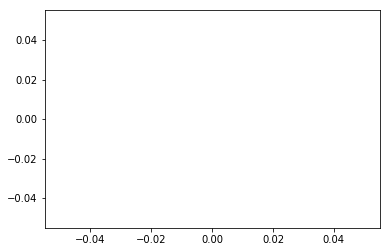

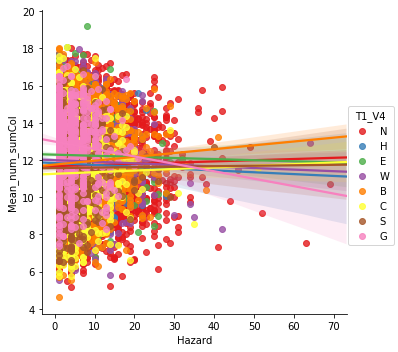

In [38]:
_=sns.lmplot(x='Hazard',y='Mean_num_sumCol',data=train_df1,hue='T1_V4',palette='Set1')
plt.show()

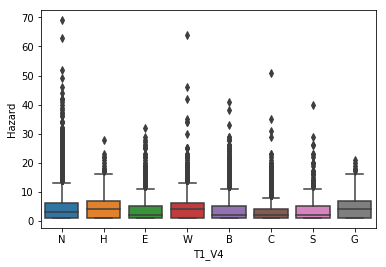

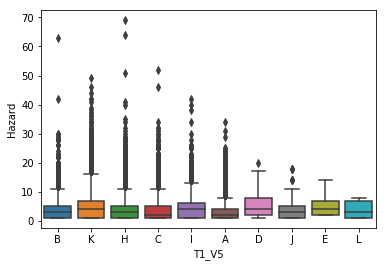

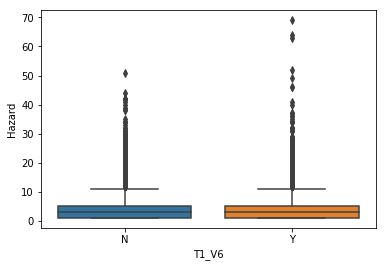

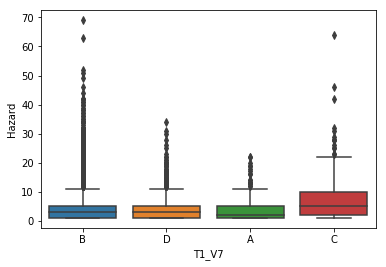

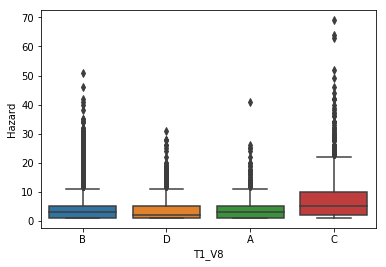

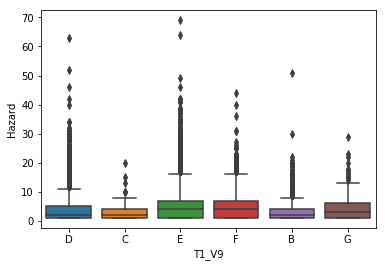

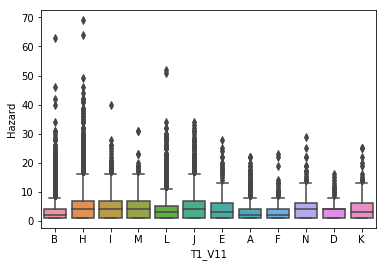

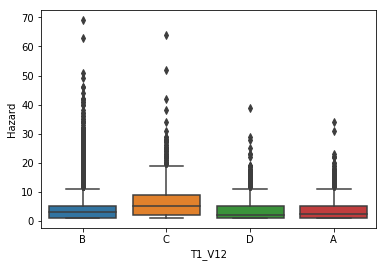

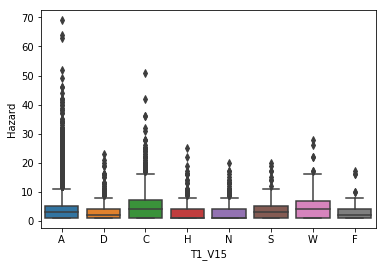

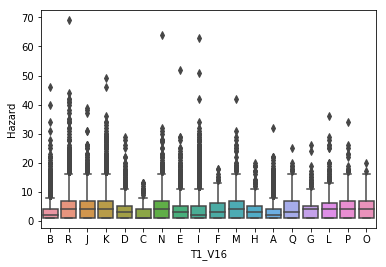

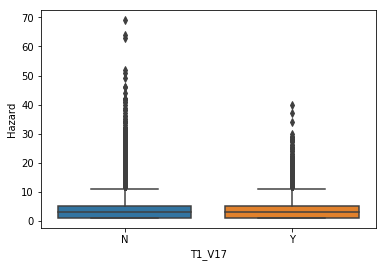

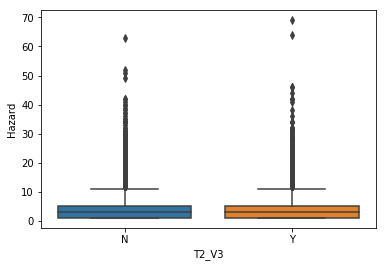

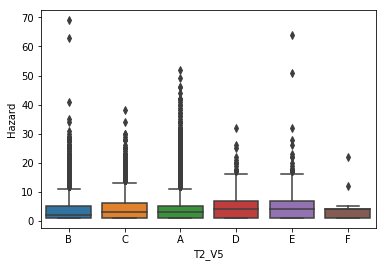

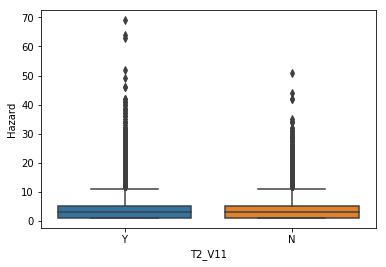

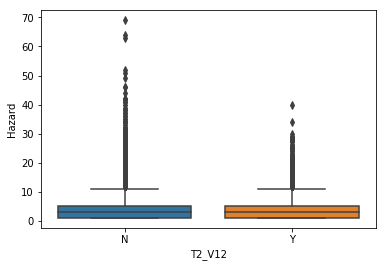

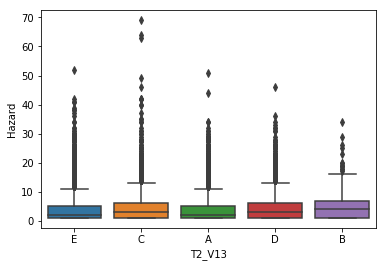

In [39]:
for col in feature_object_dtype_list:
    _=sns.boxplot(x=col,y='Hazard',data=train_df1)
    plt.show()

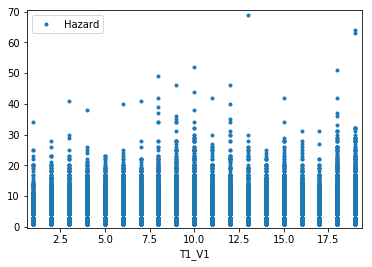

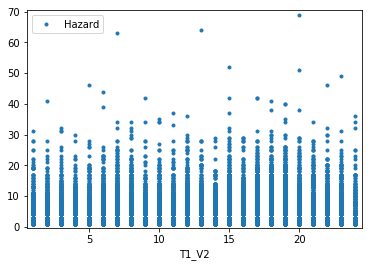

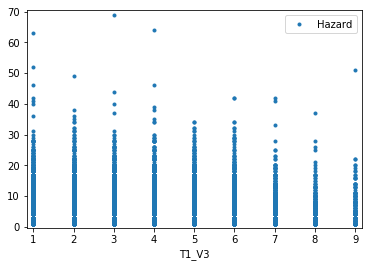

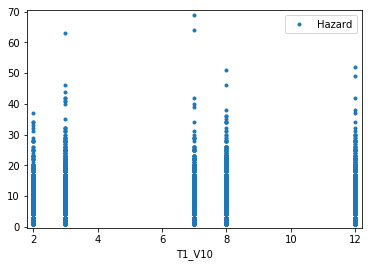

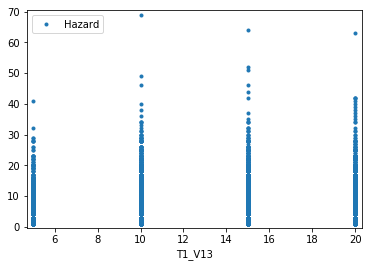

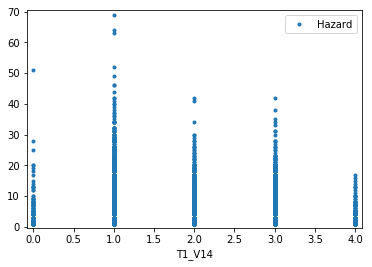

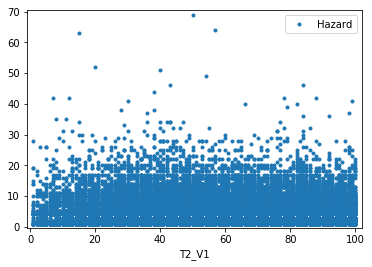

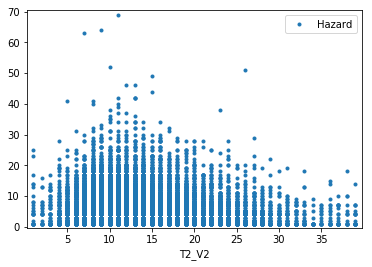

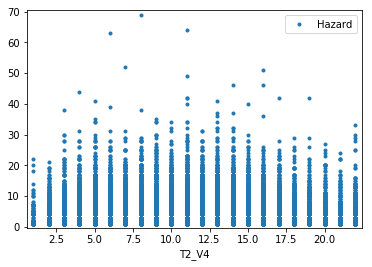

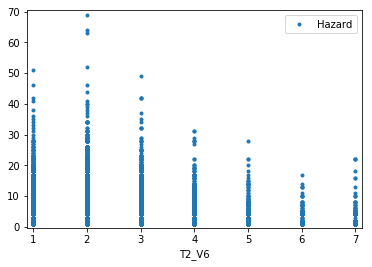

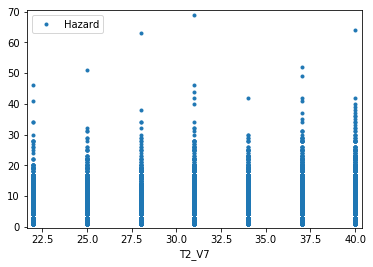

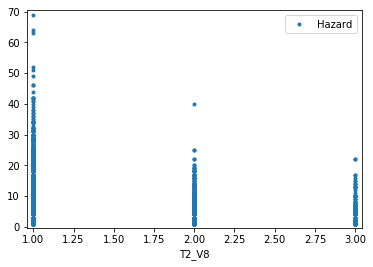

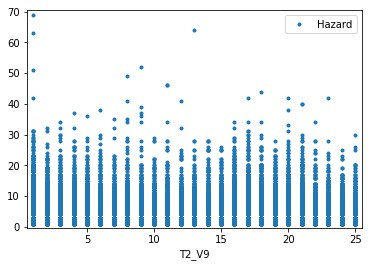

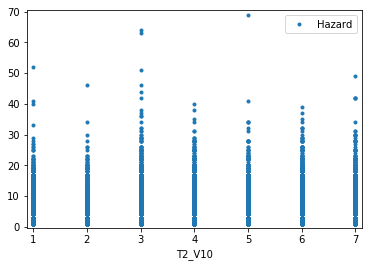

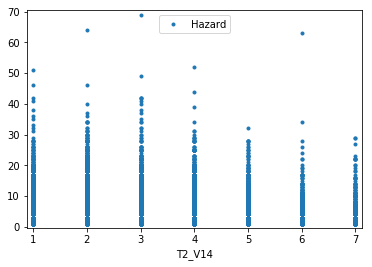

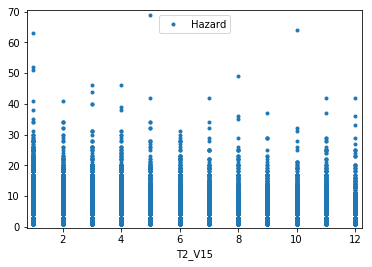

In [40]:
for col in feature_int_dtype_list:
    _=train_df1.plot(x=col,y = 'Hazard',marker='.',linestyle='none')
    plt.margins(0.02)
    plt.show()

In [41]:
def ecdf(data):
    n = len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    
    return x,y

In [42]:
tau=np.mean(hazard)
s=len(hazard)
Theor_=np.random.exponential(tau,s)
X,Y = ecdf(hazard)
Xthe,Ythe=ecdf(Theor_)
_=plt.plot(X,Y,marker='.',linestyle='None',color='red')
_=plt.plot(Xthe,Ythe,marker='.',linestyle='none',color='blue')

_=plt.margins(0.02)
_=plt.xlabel('Hazard Values')
_=plt.ylabel('CDF')
sample_half=np.random.exponential(tau/2,s)
sample_double=np.random.exponential(tau*2,s)
x_half,y_half=ecdf(sample_half)
x_double,y_double=ecdf(sample_double)
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

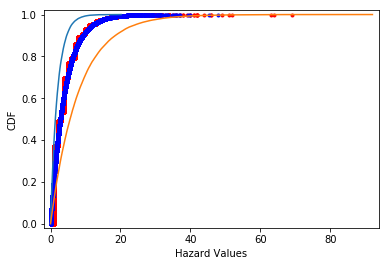

In [43]:
plt.show()

In [44]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [45]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [46]:
train_df1['Hazard'].describe()

count    50999.000000
mean         4.022785
std          4.021194
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         69.000000
Name: Hazard, dtype: float64

In [47]:
train_df1['Hazard'].median()

3.0

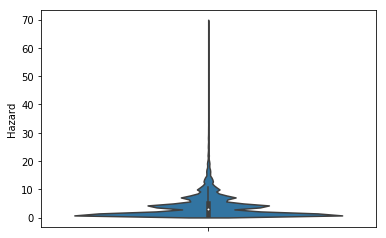

In [48]:
_=sns.violinplot(y='Hazard',data=train_df1)
plt.ylabel('Hazard')
plt.show()

In [49]:
train_df1['Insurability'] = train_df1['Hazard']<=train_df1['Hazard'].median()

In [50]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50999 entries, 0 to 50998
Data columns (total 36 columns):
Id                 50999 non-null int64
Hazard             50999 non-null int64
T1_V1              50999 non-null int64
T1_V2              50999 non-null int64
T1_V3              50999 non-null int64
T1_V4              50999 non-null object
T1_V5              50999 non-null object
T1_V6              50999 non-null object
T1_V7              50999 non-null object
T1_V8              50999 non-null object
T1_V9              50999 non-null object
T1_V10             50999 non-null int64
T1_V11             50999 non-null object
T1_V12             50999 non-null object
T1_V13             50999 non-null int64
T1_V14             50999 non-null int64
T1_V15             50999 non-null object
T1_V16             50999 non-null object
T1_V17             50999 non-null object
T2_V1              50999 non-null int64
T2_V2              50999 non-null int64
T2_V3              50999 non-null object

In [51]:
samples1=train_df1['Insurability']
samples2=np.random.exponential(4.0227847604855,51000)

In [52]:
np.sum(samples1)

27151

In [53]:
new_sam2=np.array([0 if i < 3 else 1 for i in list(samples2)])

In [54]:
def frac_less_hazard(data_1,data_2):
    frac =np.sum(data_1)/len(data_1)
    return frac

In [55]:
observed_probability=frac_less_hazard(samples1,new_sam2)
print(observed_probability)

0.532382987902


In [56]:
perm_replicates= draw_perm_reps(samples1,new_sam2,frac_less_hazard,10000)
p = np.sum(perm_replicates > observed_probability)/10000
print(p)

0.0


In [ ]:
print('The probabilty that insurabiltity of the house is dependent on the inspection'+str(p))

The probabilty that insurabiltity of the house is dependent on the inspection0.0


In [ ]:
_=sns.swarmplot(x='T1_V15',y='Hazard',data = train_df1)
plt.show()